# Preparando o Ambiente Virtual

In [1]:
# Instalando o cartopy
!pip uninstall -q shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

# Instalando Py-art
!pip install -q arm_pyart==1.15.1

- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

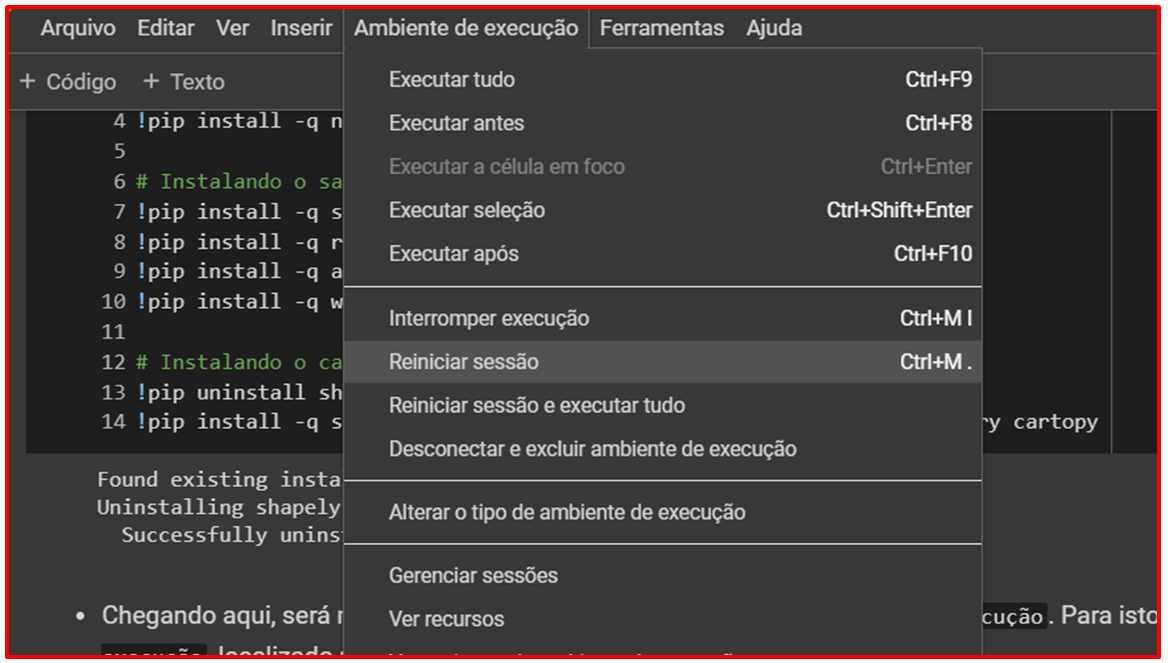

In [2]:
# Montando o Drive
from google.colab import drive
drive.mount('/content/drive')
dir =  '/content/drive/MyDrive/2-PESQUISA/1-ORIENTACOES/IC_JHONATAN/radar_cemig/'

Mounted at /content/drive


# Funções

In [3]:
import time

#-----------------------------------------------------------------------------------
#     Função que plota o PPI das variáveis polarimétricas Z, ZDR, KDP e COR
#-----------------------------------------------------------------------------------
def quicklook_ppi_z_zdr_kdp_cor(fileout, radar):

    #========================================================================================================================#
    #                                               IMPORTA BIBLIOTECAS
    #========================================================================================================================#
    import pyart
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs

    #========================================================================================================================#
    #                                           EXTRAI INFORMAÇÕES DO RADAR
    #========================================================================================================================#
    # extrai a latitude e longitude do radar
    lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]

    # limites dos dados
    latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
    lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

    # extrai a data do dado do radar
    data = pyart.util.datetime_from_grid(radar)

    # extrai ano, mês, dia, hora, minuto e segundos da data do radar
    ano = str(data.year)
    mes = str(data.month).zfill(2)
    dia = str(data.day).zfill(2)
    hor = str(data.hour).zfill(2)
    min = str(data.minute).zfill(2)
    seg = str(data.second).zfill(2)

    #========================================================================================================================#
    #                                                     PLOTA FIGURA
    #========================================================================================================================#
    # define a elevação
    level = 0 #(=primeira elevação)

    # extrai o ângulo de elevação da primeira elevação (level=0)
    str_level = str(radar.fixed_angle["data"][level])

    # moldura da figura
    fig = plt.figure(figsize=(9,9))

    # cria o objeto display
    display = pyart.graph.RadarMapDisplay(radar)

    # título de figura
    plt.suptitle(f'PPI {str_level}$^o$ - CEMIG: {ano}-{mes}-{dia} at {hor}:{min}:{seg} UTC', fontsize=13)

    #==========================#
    #       FIGURA 1: ZH
    #==========================#
    # moldura da figura
    ax1 = plt.subplot(321, projection=ccrs.PlateCarree())

    # plota o mapa
    display.plot_ppi_map('reflectivity',
                         sweep=level,
                         vmin=0,
                         vmax=70,
                         lat_0=lat_radar,
                         lon_0=lon_radar,
                         lat_lines=np.arange(latmin, latmax, 3),
                         lon_lines=np.arange(lonmin, lonmax, 3),
                         resolution='10m',
                         colorbar_label='Reflectivity [dBZ]',
                         mask_outside=False,
                         ax=ax1,
                         cmap='pyart_NWSRef') #coolwarm pyart_NWSRef

    # título da figura
    plt.title('ZH', fontsize=10)
    plt.title('a)', loc='left', fontsize=10)

    # plota aneis de distância
    display.plot_range_rings([250], ax=ax1, col='gray', ls='--', lw=1)

    #==========================#
    #      FIGURA 2: ZDR
    #==========================#
    # moldura da figura
    ax2 = plt.subplot(322, projection=ccrs.PlateCarree())

    # plota ppi
    display.plot_ppi_map('corrected_differential_reflectivity',
                         sweep=level,
                         vmin=-2,
                         vmax=6,
                         lat_0=lat_radar,
                         lon_0=lon_radar,
                         lat_lines=np.arange(latmin, latmax, 3),
                         lon_lines=np.arange(lonmin, lonmax, 3),
                         resolution='10m',
                         colorbar_label='Differential Reflectivity [dB]',
                         mask_outside=False,
                         ax=ax2,
                         cmap='coolwarm')

    # título da figura
    plt.title('ZDR', fontsize=10)
    plt.title('b)', loc='left', fontsize=10)

    # plota aneis de distância
    display.plot_range_rings([250], ax=ax2, col='gray', ls='--', lw=1)

    #==========================#
    #     FIGURA 3: KDP
    #==========================#
    # moldura da figura
    ax3 = plt.subplot(323, projection=ccrs.PlateCarree())

    # plota ppi
    display.plot_ppi_map('specific_differential_phase',
                         sweep=level,
                         vmin=-2,
                         vmax=6,
                         lat_0=lat_radar,
                         lon_0=lon_radar,
                         lat_lines=np.arange(latmin, latmax, 3),
                         lon_lines=np.arange(lonmin, lonmax, 3),
                         resolution='10m',
                         colorbar_label='Specific Differential Phase [$\degree$/km]',
                         mask_outside=False,
                         ax=ax3,
                         cmap='coolwarm')

    # título da figura
    plt.title('KDP', fontsize=10)
    plt.title('c)', loc='left', fontsize=10)

    # plota aneis de distância
    display.plot_range_rings([250], ax=ax3, col='gray', ls='--', lw=1)

    #==========================#
    #     FIGURA 4: COR
    #==========================#
    # moldura da figura
    ax4 = plt.subplot(324, projection=ccrs.PlateCarree())

    # plota ppi
    display.plot_ppi_map('cross_correlation_ratio',
                         sweep=level,
                         vmin=0.7,
                         vmax=1,
                         lat_0=lat_radar,
                         lon_0=lon_radar,
                         lat_lines=np.arange(latmin, latmax, 3),
                         lon_lines=np.arange(lonmin, lonmax, 3),
                         resolution='10m',
                         colorbar_label='Cross Correlation Ratio [#]',
                         mask_outside=False,
                         ax=ax4,
                         cmap='jet')

    # título da figura
    plt.title('RhoHV', fontsize=10)
    plt.title('d)', loc='left', fontsize=10)

        #==========================#
    #     FIGURA 5: VEL
    #==========================#
    # moldura da figura
    ax4 = plt.subplot(325, projection=ccrs.PlateCarree())

    # plota ppi
    display.plot_ppi_map('velocity',
                         sweep=level,
                         vmin=-20,
                         vmax=20,
                         lat_0=lat_radar,
                         lon_0=lon_radar,
                         lat_lines=np.arange(latmin, latmax, 3),
                         lon_lines=np.arange(lonmin, lonmax, 3),
                         resolution='10m',
                         colorbar_label='Velocity [m/s]',
                         mask_outside=False,
                         ax=ax4,
                         cmap='coolwarm')

    # título da figura
    plt.title('VEL', fontsize=10)
    plt.title('e)', loc='left', fontsize=10)

    # plota aneis de distância
    display.plot_range_rings([250], ax=ax4, col='gray', ls='--', lw=1)

    # recorta figura
    plt.tight_layout()

    # salva figura
    plt.savefig(fileout)
    print('...... Plotou quicklook \n')

# Processamento

In [ ]:
import glob
dir_input = f'{dir}input'
files = sorted(glob.glob(f'{dir_input}/RME*.UF')) # RME231003000044.RAWEAKW_OUT.UF
#files = files[0:1]  # RME231003093027.RAWEATT_OUT.UF
files[76:]


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

PROCESSANDO ===>> /content/drive/MyDrive/2-PESQUISA/1-ORIENTACOES/IC_JHONATAN/radar_cemig/input/RME231003093027.RAWEATT_OUT.UF
leituraa
...... 1. Extraiu informações da data
...... Plotou quicklook 

PROCESSANDO ===>> /content/drive/MyDrive/2-PESQUISA/1-ORIENTACOES/IC_JHONATAN/radar_cemig/input/RME231003093757.RAWEATW_OUT.UF


ConnectionAbortedError: [Errno 103] Software caused connection abort

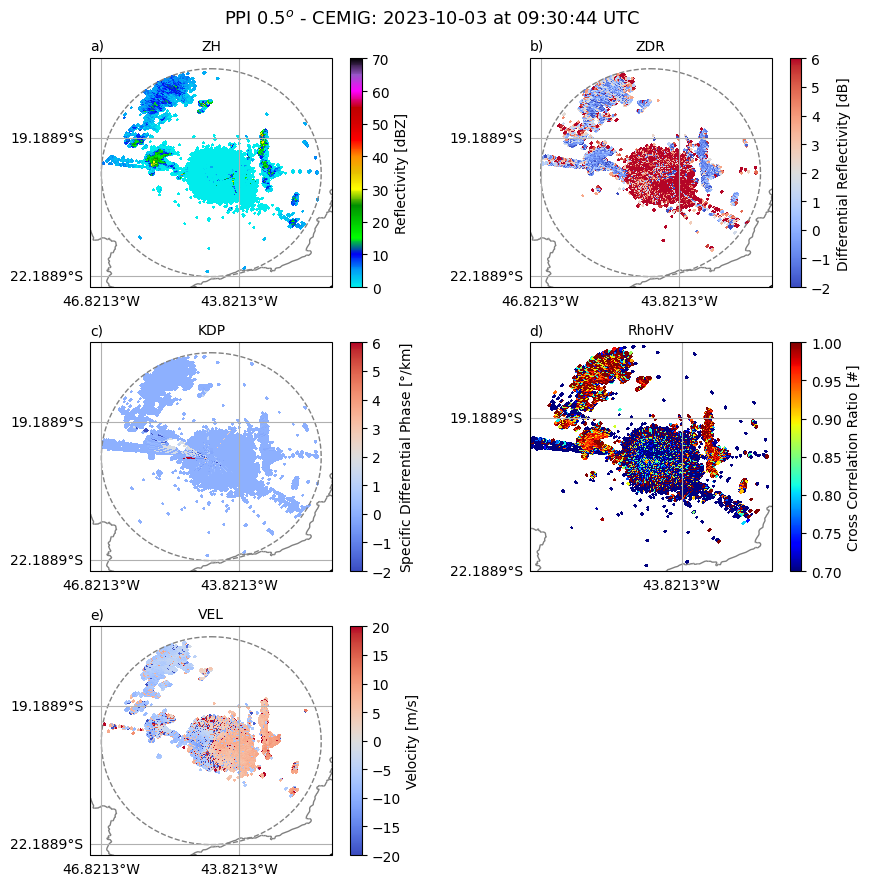

In [13]:
%%time
#========================================================================================================================#
#                                              IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pyart
import pandas as pd
import numpy as np
import glob
from datetime import datetime
import xarray as xr
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                                     DIRETÓRIOS
#========================================================================================================================#
dir_input = f'{dir}input'
dir_output = f'{dir}output/04_QUICKLOOK_PPI'

#========================================================================================================================#
#                                                 LISTA DOS ARQUIVOS
#========================================================================================================================#
files = sorted(glob.glob(f'{dir_input}/RME*.UF')) # RME231003000044.RAWEAKW_OUT.UF
files = files[76:]

#========================================================================================================================#
#                                                   PROCESSAMENTO
#========================================================================================================================#
for file in files:

    print('PROCESSANDO ===>>', file)

    #--------------------------------------------------------------#
    #                     LEITURA DO DADO
    #--------------------------------------------------------------#
    # leitura do arquivo
    radar = pyart.io.read_uf(f'{file}')
    print('leituraa')

    # extrai a data e horário do radar
    ano = str(pyart.util.datetime_from_grid(radar).year)
    mes = str(pyart.util.datetime_from_grid(radar).month).zfill(2)
    dia = str(pyart.util.datetime_from_grid(radar).day).zfill(2)
    hor = str(pyart.util.datetime_from_grid(radar).hour).zfill(2)
    min = str(pyart.util.datetime_from_grid(radar).minute).zfill(2)
    seg = str(pyart.util.datetime_from_grid(radar).second).zfill(2)

    # extrai a latitude, longitude e altitude do radar
    lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]
    altitude = radar.altitude['data'][0]

    #variaveis = pd.DataFrame(list(radar.fields))
    #print(variaveis)
    print('...... 1. Extraiu informações da data')

    #--------------------------------------------------------------#
    #                   PLOTA QUICKLOOK DO PPI
    #--------------------------------------------------------------#
    quicklook_ppi_z_zdr_kdp_cor(f'{dir_output}/quicklook_ppi_1elev_z_zdr_kdp_cor_cemig_{ano}{mes}{dia}_{hor}{min}{seg}.jpg', radar)

In [6]:
pyart.io.read_uf('/content/drive/MyDrive/2-PESQUISA/1-ORIENTACOES/IC_JHONATAN/radar_cemig/input/RME231003000756.RAWEAKZ_OUT.UF')